In [15]:
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host import UserProfileHost
from prototype.constants import RecommendationType
from prototype.utils import seed_everything

In [16]:
n_recommendations = 10
n_iterations = 20
ema_alpha = 0.2
latent_bounds = [-1., 1.]
embed_bounds = [0., 1.]
seed = 42

In [17]:
seed_everything(seed)

# Fit TSNE Representation Module from sklearn
toy_uph = UserProfileHost(original_prompt='test', n_latent_axis=1, n_embedding_axis=1, recommendation_type=RecommendationType.WEIGHTED_AXES, cache_dir='../cache/', latent_bounds=latent_bounds, embedding_bounds=embed_bounds)

# Run a few iterations to gather some points
base_user_profiles = []
for i in range(n_iterations):
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=n_recommendations)
    scores = torch.rand(size=(n_recommendations,))
    up = toy_uph.fit_user_profile(preferences=scores)
    base_user_profiles.append(up.reshape(1, -1))

base_user_profiles = torch.cat(base_user_profiles)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.37it/s]


In [18]:
seed_everything(seed)

# Fit TSNE Representation Module from sklearn
toy_uph = UserProfileHost(original_prompt='test', n_latent_axis=1, n_embedding_axis=1, recommendation_type=RecommendationType.EMA_WEIGHTED_AXES, cache_dir='../cache/', latent_bounds=latent_bounds, embedding_bounds=embed_bounds, ema_alpha=0.5)

# Run a few iterations to gather some points
ema_user_profiles = []
for i in range(n_iterations):
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=n_recommendations)
    scores = torch.rand(size=(n_recommendations,))
    up = toy_uph.fit_user_profile(preferences=scores)
    ema_user_profiles.append(up.reshape(1, -1))

ema_user_profiles = torch.cat(ema_user_profiles)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.79it/s]


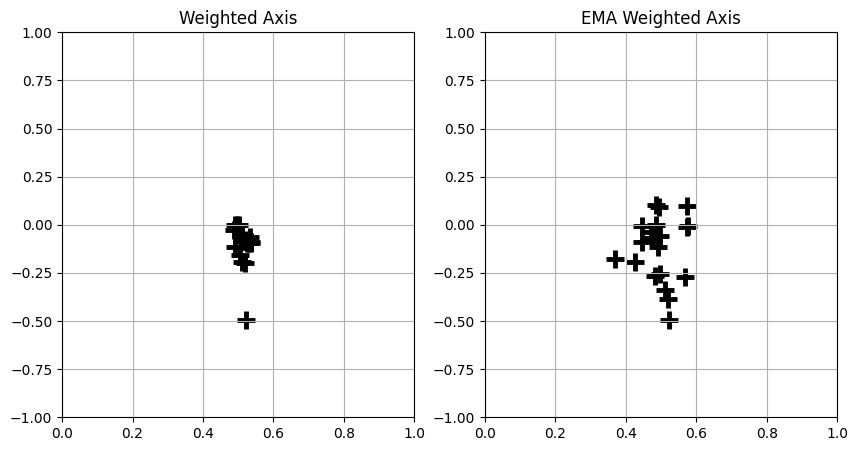

In [19]:
# PLot Embeddings with respective scores
fig, axis = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
for i, (ax, user_profiles) in enumerate(zip(axis, [base_user_profiles, ema_user_profiles])):
    plt.axes(ax)
    plt.scatter(user_profiles[:,0], user_profiles[:,1], c='black', s=150, marker='+', linewidth=3.5)
    plt.xlim(embed_bounds)
    plt.ylim(latent_bounds)
    plt.grid(True)
    plt.title('Weighted Axis' if i == 0 else 'EMA Weighted Axis')
plt.show()